## Practical No. 8

### A. AdaBoost
AdaBoost, short for Adaptive Boosting, is a popular ensemble learning algorithm that combines multiple weak learners (often decision trees) to create a strong predictive model. AdaBoost was proposed by Freund and Schapire in 1996 and has since become one of the most widely used boosting algorithms in machine learning.

The main idea behind AdaBoost is to iteratively train a sequence of weak learners, where each learner focuses on the instances that the previous learners struggled to classify correctly. In each iteration, the algorithm assigns weights to the training instances, emphasizing the misclassified instances to correct their classification in the subsequent rounds. The final prediction is made by combining the predictions of all the weak learners, weighted by their performance during training.

Here's a high-level overview of the AdaBoost algorithm:

1. Initialize the weights of training instances equally.
2. For each iteration:
   a. Train a weak learner (e.g., decision tree) on the training data, with weights assigned to each instance.
   b. Evaluate the performance of the weak learner on the training data.
   c. Adjust the weights of the training instances based on their classification accuracy, giving higher weights to misclassified instances.
3. Combine the predictions of all the weak learners by assigning weights to their predictions.
4. Make the final prediction by aggregating the weighted predictions.

AdaBoost has several advantages, including:

- It is a flexible and versatile algorithm that can be applied to various types of data and classification problems.
- It is less prone to overfitting compared to individual weak learners.
- It can handle imbalanced datasets by assigning higher weights to minority classes.
- It is relatively simple to implement and computationally efficient.

However, AdaBoost is sensitive to noisy data and outliers, which can lead to poor performance. It also requires careful parameter tuning to achieve optimal results.

Overall, AdaBoost is a powerful technique for improving the performance of weak learners by boosting their collective predictive ability.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


iris = load_iris()

data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)




ada_boost = AdaBoostClassifier(n_estimators=50)  

ada_boost.fit(X_train, y_train)

predictions = ada_boost.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


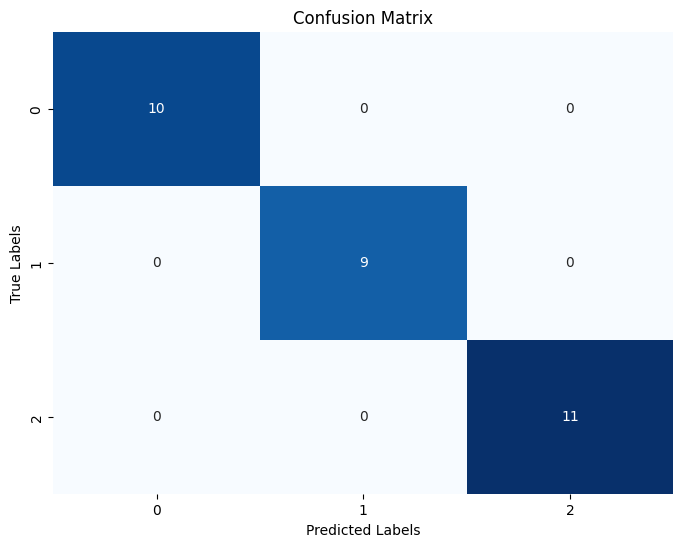

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### B. Stochastic Gradient Boosting
Stochastic Gradient Boosting, also known as Gradient Boosting Machine (GBM), is an extension of the AdaBoost algorithm that further improves its performance and efficiency. It was introduced by Friedman in 1999 and has become a popular and powerful technique in machine learning for regression and classification tasks.

Stochastic Gradient Boosting combines the concept of boosting with the idea of gradient descent optimization. It iteratively trains an ensemble of weak learners (typically decision trees) by minimizing a loss function through gradient descent. The key difference from traditional Gradient Boosting is that each weak learner is trained on a random subset of the training data, introducing an element of stochasticity or randomness.

Here's a high-level overview of the Stochastic Gradient Boosting algorithm:

1. Initialize the ensemble by fitting an initial model to the training data (e.g., a decision tree).
2. For each iteration:
   a. Sample a random subset of the training data (with replacement) called a mini-batch.
   b. Compute the negative gradient of the loss function with respect to the current ensemble predictions for the mini-batch.
   c. Fit a weak learner (e.g., decision tree) to the negative gradient, aiming to minimize the loss function.
   d. Update the ensemble predictions by adding the predictions of the new weak learner, weighted by a learning rate.
3. Repeat steps 2 for a specified number of iterations or until a stopping criterion is met.
4. Make predictions by combining the predictions of all the weak learners in the ensemble.

Stochastic Gradient Boosting has several advantages over traditional Gradient Boosting:

- It introduces randomness by using random subsets of the training data, which can improve the model's generalization and reduce overfitting.
- It can handle large datasets more efficiently, as training on mini-batches reduces computational requirements.
- It can handle high-dimensional data and capture complex non-linear relationships.

However, Stochastic Gradient Boosting may require careful parameter tuning, such as the learning rate, number of iterations, and the size of the mini-batches. It is also important to monitor the model's performance to prevent overfitting.

Overall, Stochastic Gradient Boosting is a powerful ensemble learning technique that combines boosting and gradient descent optimization to create a strong predictive model. It is widely used in various machine learning tasks and has achieved state-of-the-art performance in many domains.

Accuracy: 1.0


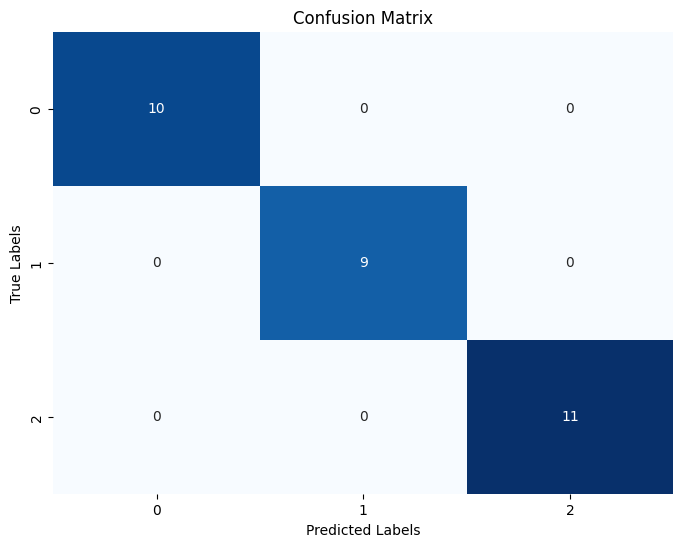

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer


iris = load_iris()


data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

stochastic_boost = GradientBoostingClassifier(n_estimators=50, subsample=0.8)  # Adjust the subsample value

stochastic_boost.fit(X_train, y_train)

predictions = stochastic_boost.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### C. Voting Ensemble
Voting Ensemble, also known as Majority Voting or Majority Rule, is an ensemble learning technique that combines predictions from multiple individual models to make a final prediction. It is a simple yet effective method that leverages the wisdom of the crowd to improve the accuracy and robustness of the prediction.

The basic idea behind Voting Ensemble is that different models may have different strengths and weaknesses, and by combining their predictions, we can achieve a more balanced and accurate prediction. In a binary classification problem, Voting Ensemble considers the majority vote of the individual models to determine the final prediction.

There are two main types of Voting Ensembles:

1. Hard Voting: In hard voting, each model in the ensemble predicts a class label, and the class label that receives the majority of votes is selected as the final prediction. In the case of a tie, some strategies can be applied, such as selecting the class label with the highest confidence or randomly choosing one of the tied labels.

2. Soft Voting: In soft voting, each model in the ensemble provides a probability or confidence score for each class label. These probabilities or scores are averaged or weighted, and the class label with the highest average or weighted score is selected as the final prediction. Soft voting takes into account the level of confidence or certainty from each model.

Here's a high-level overview of the Voting Ensemble algorithm:

1. Train multiple individual models on the same training dataset using different algorithms or hyperparameters.
2. For classification problems, each model makes predictions by assigning class labels or providing probability scores for each class.
3. In hard voting, the final prediction is determined by selecting the class label with the majority of votes from the individual models.
4. In soft voting, the final prediction is determined by averaging or weighting the probability scores from the individual models and selecting the class label with the highest average or weighted score.
5. For regression problems, the individual models' predictions can be averaged or combined using other aggregation techniques, such as taking the mean or median value.

Voting Ensembles have several advantages:

- They can improve the predictive performance and accuracy compared to individual models, especially when the individual models have different strengths.
- They can handle diverse types of data and model architectures, allowing flexibility in model selection.
- They can provide more robust predictions by reducing the impact of outliers or misclassified instances.

However, Voting Ensembles may not always yield improved performance if the individual models are highly correlated or if there is a dominant model that consistently outperforms the others.

Overall, Voting Ensemble is a popular ensemble learning technique that combines predictions from multiple models to make a final prediction. It is widely used in practice and has been shown to improve the accuracy and robustness of predictions in various machine learning tasks.

Accuracy: 1.0


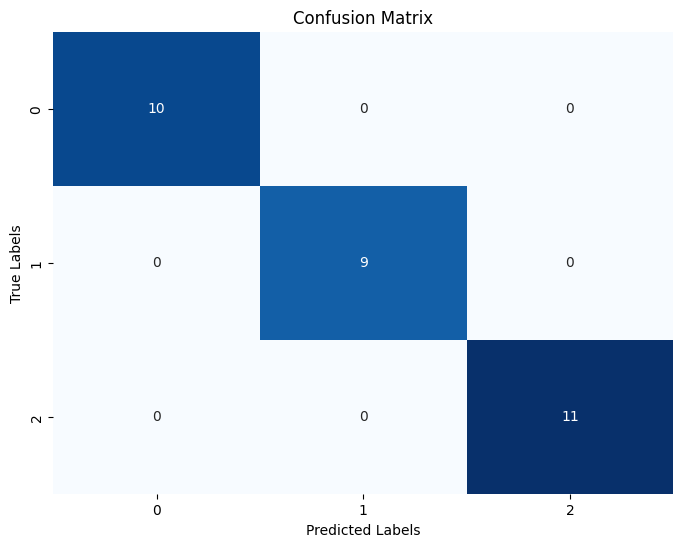

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer


iris = load_iris()

data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = data.drop('target', axis=1)
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

ada_boost = AdaBoostClassifier(n_estimators=50)
stochastic_boost = GradientBoostingClassifier(n_estimators=50, subsample=0.8)
voting_ensemble = VotingClassifier(estimators=[('ada_boost', ada_boost), ('stochastic_boost', stochastic_boost)])

voting_ensemble.fit(X_train, y_train)

predictions = voting_ensemble.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_iris


data = load_iris()
X = data.data
y = data.target

selector = SelectKBest(score_func=mutual_info_classif, k=2) 
X_selected = selector.fit_transform(X, y)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_selected)

transformer = PowerTransformer(method='yeo-johnson')  
X_transformed = transformer.fit_transform(X_normalized)
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_transformed)

print("Transformed and Reduced Data:")
print(X_pca)


Transformed and Reduced Data:
[[-1.85817383e+00 -3.14644996e-03]
 [-1.85817383e+00 -3.14644996e-03]
 [-1.89178500e+00  3.04647128e-02]
 [-1.82423795e+00 -3.70823307e-02]
 [-1.85817383e+00 -3.14644996e-03]
 [-1.56869616e+00  8.07836291e-02]
 [-1.76480254e+00  9.02248466e-02]
 [-1.82423795e+00 -3.70823307e-02]
 [-1.85817383e+00 -3.14644996e-03]
 [-1.91764953e+00 -1.30493909e-01]
 [-1.82423795e+00 -3.70823307e-02]
 [-1.78997936e+00 -7.13409191e-02]
 [-1.95158541e+00 -9.65580286e-02]
 [-2.05143648e+00  3.29303810e-03]
 [-1.92506938e+00  6.37491023e-02]
 [-1.63753407e+00  1.49621547e-01]
 [-1.70508112e+00  2.17168590e-01]
 [-1.76480254e+00  9.02248466e-02]
 [-1.66202874e+00 -1.25489519e-02]
 [-1.73086666e+00  5.62889659e-02]
 [-1.75540003e+00 -1.05920248e-01]
 [-1.63753407e+00  1.49621547e-01]
 [-1.99064939e+00  1.29329106e-01]
 [-1.47540084e+00  1.74078944e-01]
 [-1.68528681e+00 -1.76033470e-01]
 [-1.78997936e+00 -7.13409191e-02]
 [-1.60327549e+00  1.15362958e-01]
 [-1.82423795e+00 -3.7082

Original Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.

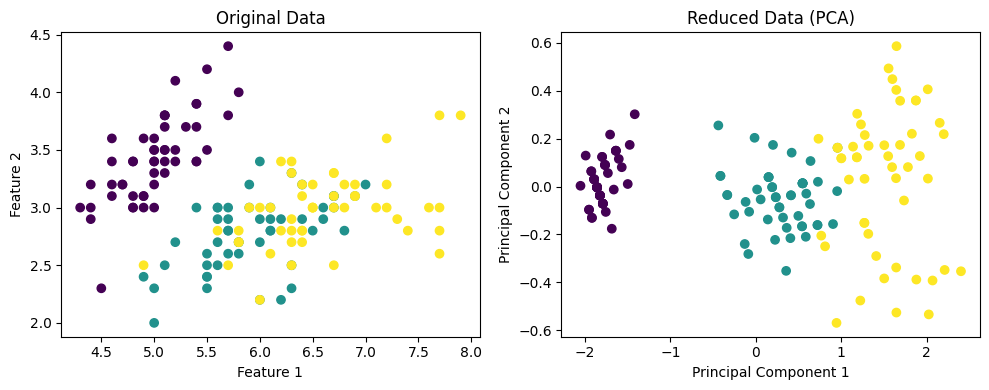

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

selector = SelectKBest(score_func=mutual_info_classif, k=2) 
X_selected = selector.fit_transform(X, y)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_selected)
transformer = PowerTransformer(method='yeo-johnson') 
X_transformed = transformer.fit_transform(X_normalized)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_transformed)

print("Original Data:")
print(X)
print("\nReduced Data (PCA):")
print(X_pca)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Reduced Data (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


## Conclusion
I learnt about Voting Ensemble, Adaboost, Stochastic Gradient Boosting